In [1]:
 #list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = !unrar x /content/drive/MyDrive/Colab_Notebooks/PILLS.rar

In [4]:
data=r'/content/train'

In [5]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [6]:
images[:20]

['/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (6).jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (9) - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (19) - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (11) - Copy - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (8) - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (1).jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (22) - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (12) - Copy - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (1) - Copy - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (7) - Copy - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (2) - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (6) - Copy - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (16) - Copy.jpg',
 '/content/train/Oseltamivir 45 MG/Oseltamivir 45 MG (21) - Copy

In [7]:
len(images)

994

In [8]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [9]:
class_values[:10]

['Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG',
 'Oseltamivir 45 MG']

In [10]:
len(class_values)

994

In [11]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

In [12]:
data

,image_path,Class_label
0,/content/train/mycophenolate mofetil 250 MG/my...,mycophenolate mofetil 250 MG
1,/content/train/celecoxib 200 MG/celecoxib 200 ...,celecoxib 200 MG
2,/content/train/Ramipril 5 MG/Ramipril 5 MG (1)...,Ramipril 5 MG
3,/content/train/pantoprazole 40 MG/pantoprazole...,pantoprazole 40 MG
4,/content/train/tadalafil 5 MG/tadalafil 5 MG (...,tadalafil 5 MG
...,...,...
989,/content/train/Atomoxetine 25 MG/Atomoxetine 2...,Atomoxetine 25 MG
990,/content/train/pantoprazole 40 MG/pantoprazole...,pantoprazole 40 MG
991,/content/train/sitagliptin 50 MG/sitagliptin 5...,sitagliptin 50 MG
992,/content/train/montelukast 10 MG/montelukast 1...,montelukast 10 MG


In [13]:
data.shape

(994, 2)

In [14]:
data.Class_label.value_counts()

,count
Class_label,
aprepitant 80 MG,62
Atomoxetine 25 MG,56
mycophenolate mofetil 250 MG,54
benzonatate 100 MG,53
apixaban 2.5 MG,52
carvedilol 3.125 MG,52
prasugrel 10 MG,52
sitagliptin 50 MG,52
duloxetine 30 MG,50


/tmp/ipython-input-15-3581667186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
/tmp/ipython-input-15-3581667186.py:3: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

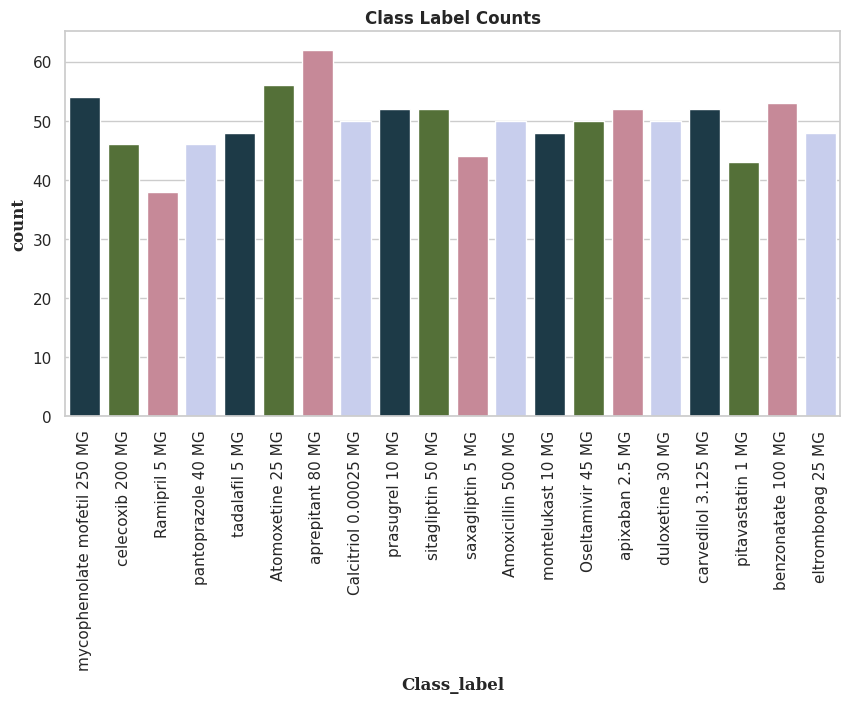

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [16]:
df = data
df.head()

,image_path,Class_label
0,/content/train/mycophenolate mofetil 250 MG/my...,mycophenolate mofetil 250 MG
1,/content/train/celecoxib 200 MG/celecoxib 200 ...,celecoxib 200 MG
2,/content/train/Ramipril 5 MG/Ramipril 5 MG (1)...,Ramipril 5 MG
3,/content/train/pantoprazole 40 MG/pantoprazole...,pantoprazole 40 MG
4,/content/train/tadalafil 5 MG/tadalafil 5 MG (...,tadalafil 5 MG


In [17]:
import os
from PIL import Image

In [18]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [19]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [20]:
images

[array([[[115, 115, 115],
         [115, 115, 115],
         [114, 114, 114],
         ...,
         [118, 118, 118],
         [116, 116, 116],
         [114, 114, 114]],
 
        [[116, 116, 116],
         [115, 115, 115],
         [115, 115, 115],
         ...,
         [115, 115, 115],
         [115, 115, 115],
         [115, 115, 115]],
 
        [[117, 117, 117],
         [115, 115, 115],
         [117, 117, 117],
         ...,
         [114, 114, 114],
         [115, 115, 115],
         [115, 115, 115]],
 
        ...,
 
        [[118, 118, 118],
         [118, 118, 118],
         [118, 118, 118],
         ...,
         [115, 115, 115],
         [116, 116, 116],
         [118, 118, 118]],
 
        [[118, 118, 118],
         [118, 118, 118],
         [118, 118, 118],
         ...,
         [117, 117, 117],
         [117, 117, 117],
         [118, 118, 118]],
 
        [[118, 118, 118],
         [118, 118, 118],
         [116, 116, 116],
         ...,
         [118, 118, 118],
  

In [21]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [22]:
num_classes

20

In [23]:
# save the class into class_names
class_names = list(data['Class_label'])

In [24]:
# Print the shape of the image
images[100].shape

(224, 224, 3)

Text(0.5, 1.0, 'prasugrel 10 MG')

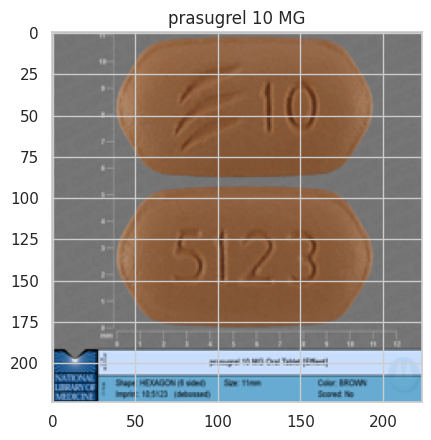

In [25]:
#See the image with class label
plt.imshow(images[29])
plt.title(class_names[29])

Text(0.5, 1.0, 'Ramipril 5 MG')

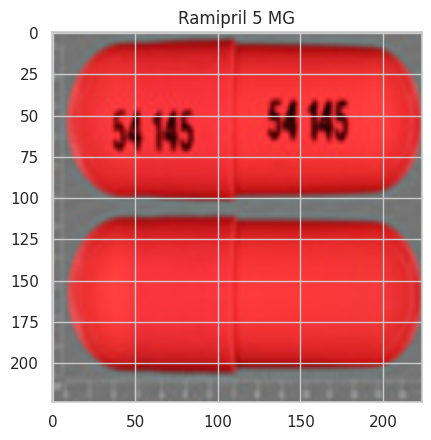

In [26]:
#See the image with class label
plt.imshow(images[79])
plt.title(class_names[79])

Text(0.5, 1.0, 'Oseltamivir 45 MG')

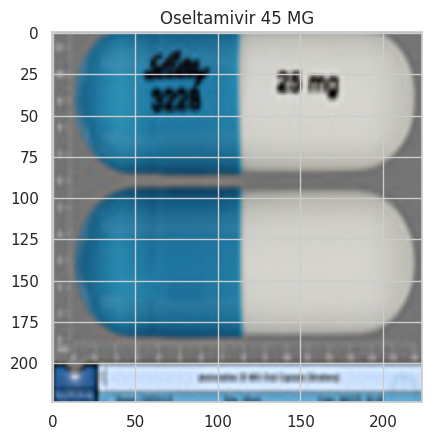

In [27]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[515])

In [28]:
# Convert the images into array
images =  np.array(images)

In [29]:
# Shape of the images
images.shape

(994, 224, 224, 3)

In [30]:

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(df['Class_label'])

In [34]:
y[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [31]:
y.shape

(994, 20)

In [32]:
enc.classes_

array(['Amoxicillin 500 MG', 'Atomoxetine 25 MG', 'Calcitriol 0.00025 MG',
       'Oseltamivir 45 MG', 'Ramipril 5 MG', 'apixaban 2.5 MG',
       'aprepitant 80 MG', 'benzonatate 100 MG', 'carvedilol 3.125 MG',
       'celecoxib 200 MG', 'duloxetine 30 MG', 'eltrombopag 25 MG',
       'montelukast 10 MG', 'mycophenolate mofetil 250 MG',
       'pantoprazole 40 MG', 'pitavastatin 1 MG', 'prasugrel 10 MG',
       'saxagliptin 5 MG', 'sitagliptin 50 MG', 'tadalafil 5 MG'],
      dtype='<U28')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=50)

In [35]:
X_train.shape

(695, 224, 224, 3)

In [36]:
X_test.shape

(299, 224, 224, 3)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model_cnn = Sequential()

# First Convolutional Block
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Second Convolutional Block
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Third Convolutional Block
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Flatten and Dense Layers
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))  # High dropout for generalization
model_cnn.add(Dense(20, activation='softmax'))  # Adjust the output layer for 20 classes

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Train the model
# Assuming X_train, y_train, X_test, y_test are prepared and compatible with the model
batch_size = 100
epochs = 20
history = model_cnn.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 186s 25s/step - accuracy: 0.1683 - loss: 4.3500 - val_accuracy: 0.1237 - val_loss: 7.4521
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 173s 22s/step - accuracy: 0.3949 - loss: 2.0913 - val_accuracy: 0.1538 - val_loss: 6.4842
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 213s 23s/step - accuracy: 0.5452 - loss: 1.4451 - val_accuracy: 0.2107 - val_loss: 5.6143
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 165s 24s/step - accuracy: 0.6440 - loss: 1.1852 - val_accuracy: 0.1505 - val_loss: 7.0283
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 200s 23s/step - accuracy: 0.6936 - loss: 0.9750 - val_accuracy: 0.1338 - val_loss: 8.4533
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 164s 24s/step - accuracy: 0.7725 - loss: 0.7055 - val_accuracy: 0.1538 - val_loss: 8.0324
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 173s 25s/step - accuracy: 0.7747 - loss: 0.7329 - val_accuracy: 0.1639 - val_loss: 7.1485
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 162s 23s/step - accuracy: 0.7973 - loss: 0.6726 - val_accuracy: 0.2074 - val_loss:

In [38]:
#print the test accuracy
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8227424621582031


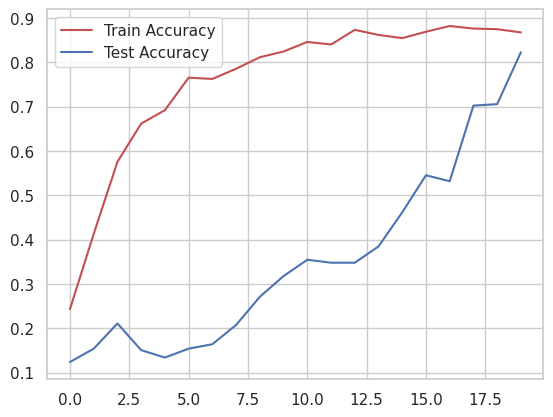

In [39]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

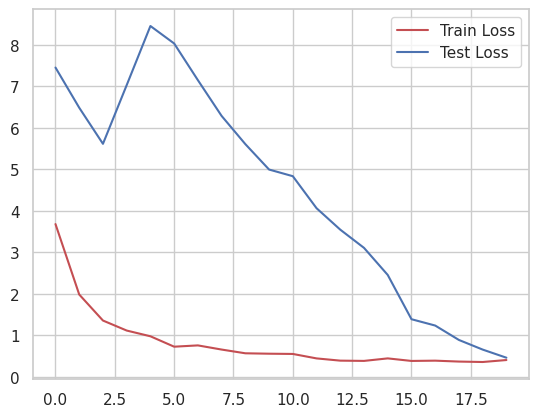

In [40]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


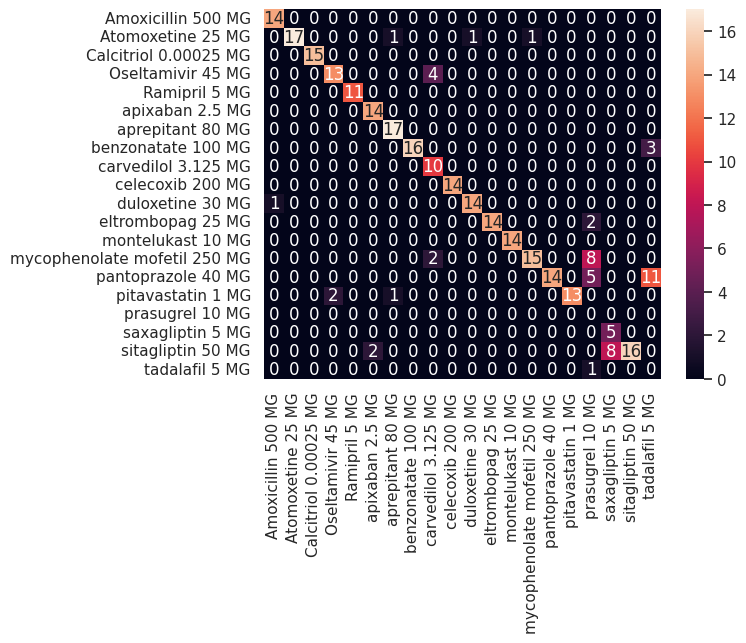

In [41]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_cnn.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

# Model Definition
model_mob = Sequential()
mob = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model_mob.add(mob)  # Assuming 'mob' is a pre-trained model or feature extractor
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(BatchNormalization())
model_mob.add(Dropout(0.5))  # Increased dropout rate for better generalization
model_mob.add(Dense(64, activation='relu'))  # Reduced model complexity
model_mob.add(Dropout(0.5))
model_mob.add(Dense(20, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model_mob.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training with data augmentation if possible
# Assuming X_train, y_train are your training data
# Use an image data generator to apply real-time data augmentation during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Fit the model using the data generator
model_mob.fit(datagen.flow(X_train, y_train, batch_size=100), epochs=10, validation_data=(X_test, y_test))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 277s 32s/step - accuracy: 0.0926 - loss: 4.1945 - val_accuracy: 0.0702 - val_loss: 4.2487
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 206s 29s/step - accuracy: 0.2792 - loss: 2.5806 - val_accuracy: 0.0836 - val_loss: 4.3043
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 270s 31s/step - accuracy: 0.4262 - loss: 1.8678 - val_accuracy: 0.1271 - val_loss: 3.9894
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 218s 32s/step - accuracy: 0.5162 - loss: 1.4632 - val_accuracy: 0.1304 - val_loss: 3.5700
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 205s 29s/step - accuracy: 0.6132 - loss: 1.2186 - val_accuracy: 0.1371 - val_loss: 3.3433
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 215s 31s/step - accuracy: 0.6766 - loss: 1.0874 - val_accuracy: 0.1271 - val_loss: 3.1929
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 217s 31s/step - accuracy: 0.7474 - loss: 0.8764 - val_accuracy: 0.1538 - val_loss: 3.0282
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 216s 31s/step - accuracy: 0.7384 - loss: 0.8451 - val_accuracy: 0.2441 - val_loss:

In [60]:
History_mob = model_mob.fit(
    datagen.flow(X_train, y_train, batch_size=100),
    epochs=10,
    validation_data=(X_test, y_test)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 253s 34s/step - accuracy: 0.8433 - loss: 0.6130 - val_accuracy: 0.2876 - val_loss: 2.6606
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 227s 33s/step - accuracy: 0.8004 - loss: 0.6671 - val_accuracy: 0.3010 - val_loss: 2.6038
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 263s 33s/step - accuracy: 0.8284 - loss: 0.5658 - val_accuracy: 0.3043 - val_loss: 2.5289
Epoch 4/10
2/7 ━━━━━━━━━━━━━━━━━━━━ 2:32 30s/step - accuracy: 0.8375 - loss: 0.5912

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


7/7 ━━━━━━━━━━━━━━━━━━━━ 228s 33s/step - accuracy: 0.8459 - loss: 0.5792 - val_accuracy: 0.3144 - val_loss: 2.4191
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 226s 32s/step - accuracy: 0.8583 - loss: 0.5194 - val_accuracy: 0.3211 - val_loss: 2.3442
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 220s 31s/step - accuracy: 0.8716 - loss: 0.4706 - val_accuracy: 0.2709 - val_loss: 2.3143
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 229s 33s/step - accuracy: 0.8583 - loss: 0.5200 - val_accuracy: 0.2475 - val_loss: 2.3215
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 228s 33s/step - accuracy: 0.8806 - loss: 0.4528 - val_accuracy: 0.2475 - val_loss: 2.3277
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 233s 34s/step - accuracy: 0.8993 - loss: 0.4293 - val_accuracy: 0.2341 - val_loss: 2.3159
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 231s 33s/step - accuracy: 0.8848 - loss: 0.4320 - val_accuracy: 0.2676 - val_loss: 2.2297


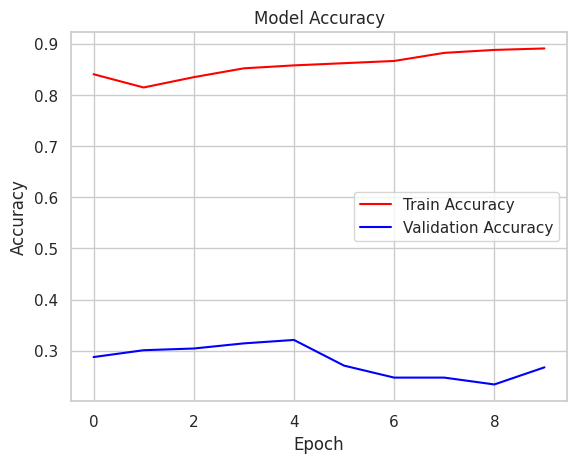

In [61]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(History_mob.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(History_mob.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

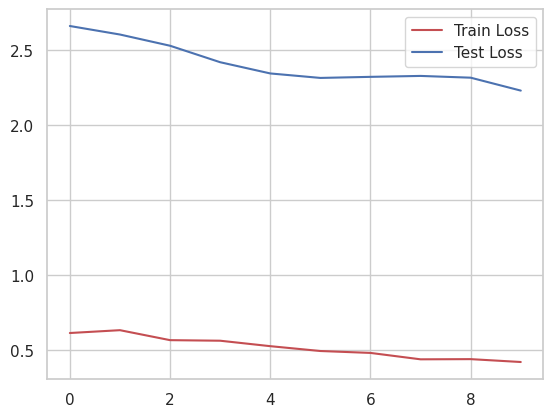

In [62]:
# plot the accuracy plot
plt.plot(History_mob.history['loss'], 'r')
plt.plot(History_mob.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [63]:
#print the test accuracy
score = model_mob.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.2675585150718689


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


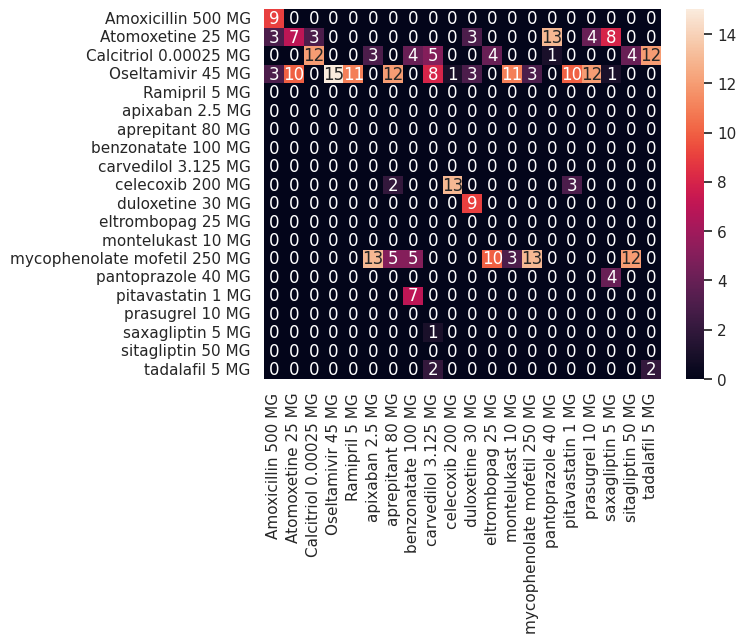

In [64]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_mob.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted class: Oseltamivir 45 MG
Actual class: carvedilol 3.125 MG


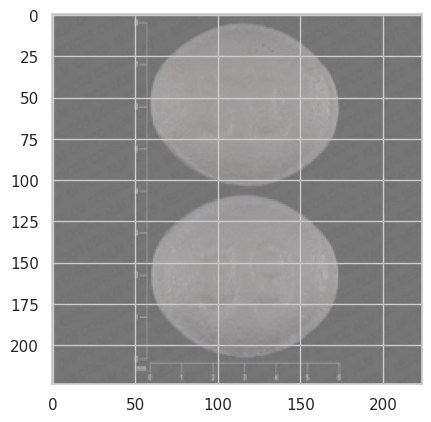

In [65]:
i = 44
pred = np.argmax(model_mob.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])